In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
X=pd.read_csv("mnist_test.csv")

In [3]:
labels=X['label']
X.drop(columns=['label'], axis=0, inplace=True)
mnist=X.copy()

In [4]:
X=X.to_numpy()
X.shape

(10000, 784)

In [5]:
X_meaned = X - np.mean(X , axis = 0)
print (X_meaned)
print(X.shape)
print (X_meaned.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 784)
(10000, 784)


In [6]:
cov_mat = np.cov(X_meaned, rowvar = False)   # rowvar = False >> work with X_meaned as transposed
print (cov_mat.shape)
print (cov_mat)

(784, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print (eigen_vectors.shape)
print (eigen_values)

(784, 784)
[-3.00641167e-11 -6.72074142e-12 -6.19267546e-12 -5.49869341e-12
 -4.15605928e-12 -2.96687984e-12 -2.49851200e-12 -2.23255325e-12
 -2.06259464e-12 -1.23095246e-12 -1.09509975e-12 -9.86357120e-13
 -5.66193642e-13 -4.95301667e-13 -4.29311197e-13 -3.81320998e-13
 -3.35697879e-13 -1.03637351e-13 -6.71760020e-14 -6.71542428e-14
 -4.46392718e-14 -4.07736846e-14 -2.63643048e-14 -2.18655640e-14
 -1.97941853e-14 -1.15462966e-14 -9.15287107e-15 -6.28845744e-15
 -5.55493354e-15 -4.47713198e-15 -1.11921773e-15 -9.35655551e-16
 -4.12064213e-16 -1.95305889e-16 -1.20539695e-16 -3.13111967e-17
 -2.05417020e-28 -1.87625307e-28 -4.97500188e-30 -3.38530940e-30
 -5.29725015e-31 -2.04269981e-32 -1.36778777e-32 -1.05116664e-44
 -7.26559390e-46  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+

In [8]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print (sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

[783 782 781 780 779 778 777 776 775 774 773 772 771 770 769 768 767 766
 765 764 763 762 761 760 759 758 757 756 755 754 753 752 751 750 749 748
 747 746 745 744 743 742 741 740 739 738 737 736 735 734 733 732 731 730
 729 728 727 726 725 724 723 722 721 720 719 718 717 716 715 714 713 712
 711 710 709 708 707 706 705 704 703 702 701 700 699 698 697 696 695 694
 693 692 691 690 689 688 687 686 685 684 683 682 681 680 679 678 677 676
 675 674 673 672 671 670 669 668 667 666 665 664 663 662 661 660 659 658
 657 656 655 654 653 652 651 650 649 648 647 646 645 644 643 642 641 640
 639 638 637 636 635 634 633 632 631 630 629 628 627 626 625 624 623 622
 621 620 619 618 617 616 615 614 613 612 611 610 609 608 607 606 605 604
 603 602 601 600 599 598 597 596 595 594 593 592 591 590 589 588 587 586
 585 584 583 582 581 580 579 578 577 576 575 574 573 572 571 570 569 568
 567 566 565 564 563 562 561 560 559 558 557 556 555 554 553 552 551 550
 549 548 547 546 545 544 543 542 541 540 539 538 53

In [9]:
def compression_ratio(start_components,end_components):
    eigenvalue_used=0
    for i in range(start_components,end_components+1):
        eigenvalue_used+=sorted_eigenvalue[i]
    return round((eigenvalue_used/sorted_eigenvalue.sum())*100,2)

Compression Ratio: 95.12%


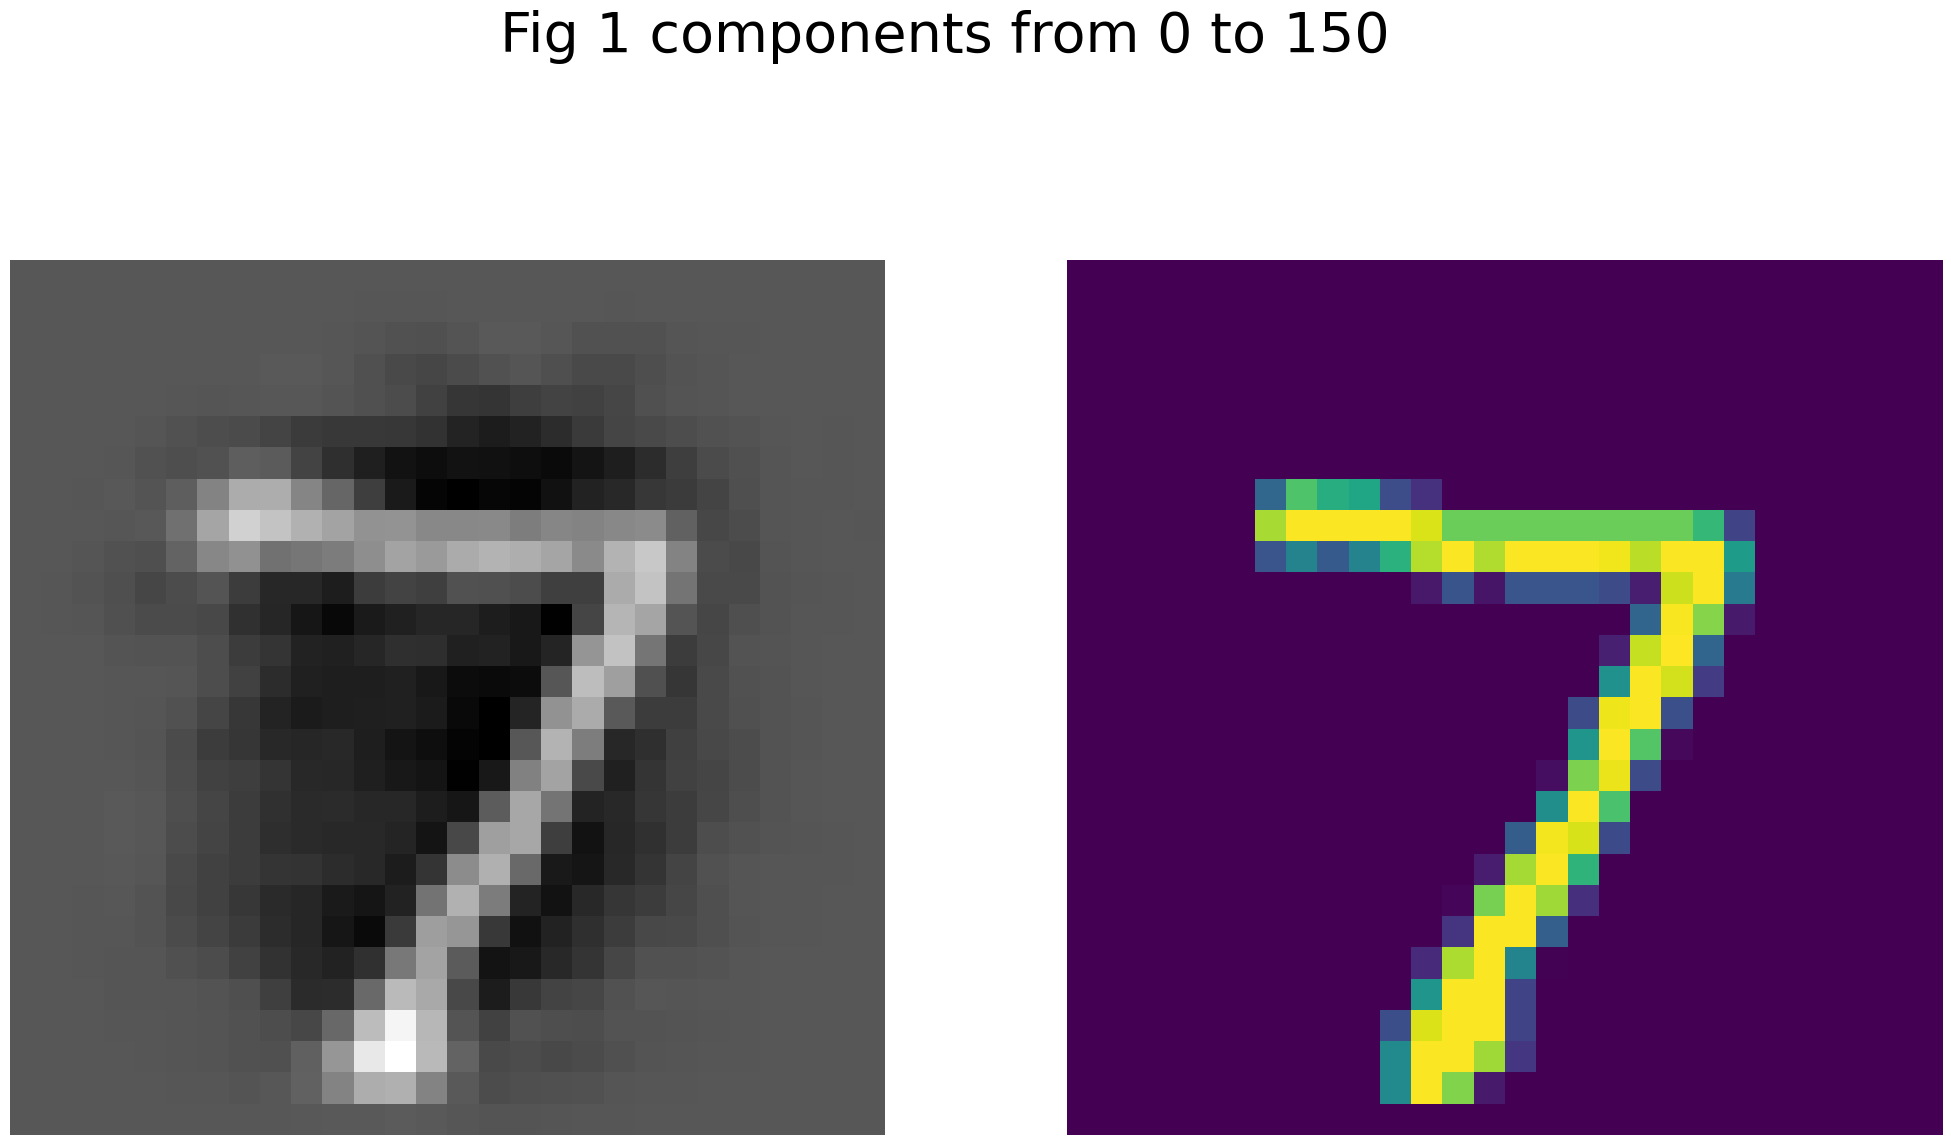

In [10]:
start = 0
end_components = 150 #you can select any number of components.

eigenvector_subset = sorted_eigenvectors[:,start:end_components]
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

#compression_ratio
print("Compression Ratio: "+str(compression_ratio(start,end_components))+"%")

#reconstructing image
temp= np.matmul(eigenvector_subset,X_reduced[0])
temp=temp.real
#real image
test=np.array(mnist.iloc[0])
Y = np.reshape(test, (28, 28))

#plotting
fig = plt.figure(figsize=[25,25])
plt.suptitle('Fig 1 components from '+str(start)+' to '+str(end_components),fontsize=40)

fig.add_subplot(2,2,1)
plt.imshow(temp.reshape(28,28) , cmap= 'gray')
plt.axis('off')

fig.add_subplot(2,2,2)
plt.imshow(Y)
plt.axis('off')

plt.show()

# Use only one image

In [11]:
X2=cv2.imread("spiderman.jpg",0)
mnist=X2
X2.shape

(1920, 1080)

(1080, 50) (1920, 50)
Compression Ratio: 83.47%


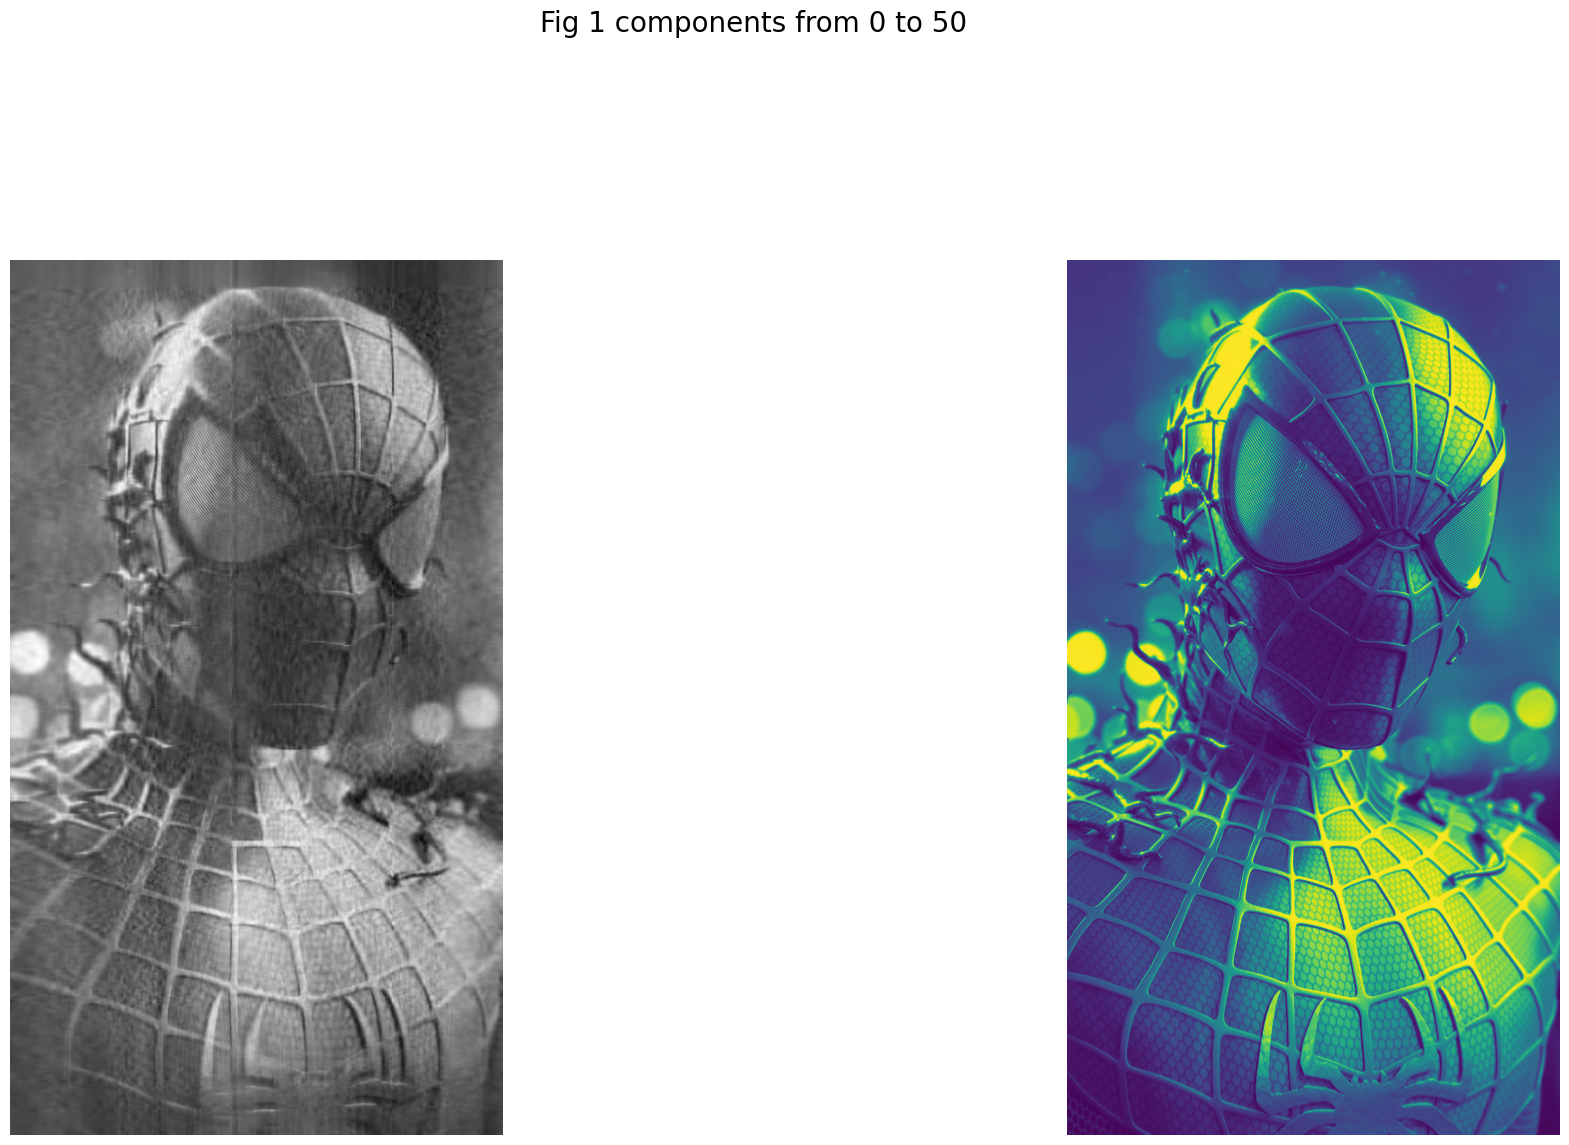

In [14]:
X_meaned2 = X2 - np.mean(X2 , axis = 0)
cov_mat2 = np.cov(X_meaned2, rowvar = False)   # rowvar = False >> work with X_meaned as transposed
eigen_values2 , eigen_vectors2 = np.linalg.eigh(cov_mat2)
#sort the eigenvalues in descending order
sorted_index2 = np.argsort(eigen_values2)[::-1]
sorted_eigenvalue2 = eigen_values2[sorted_index2]
#similarly sort the eigenvectors 
sorted_eigenvectors2 = eigen_vectors2[:,sorted_index2]


start = 0
end_components = 50 #you can select any number of components.

eigenvector_subset2 = sorted_eigenvectors2[:,start:end_components]
X_reduced2 = np.dot(eigenvector_subset2.transpose(),X_meaned2.transpose()).transpose()
print(eigenvector_subset2.shape,X_reduced2.shape)
#compression_ratio
print("Compression Ratio: "+str(compression_ratio(start,end_components))+"%")

#reconstructing image
temp= np.matmul(X_reduced2,eigenvector_subset2.T)
temp=temp.real

#plotting
fig = plt.figure(figsize=[25,25])
plt.suptitle('Fig 1 components from '+str(start)+' to '+str(end_components),fontsize=20)

fig.add_subplot(2,2,1)
plt.imshow(temp.reshape(1920,1080) , cmap= 'gray')
plt.axis('off')

fig.add_subplot(2,2,2)
plt.imshow(mnist)
plt.axis('off')

plt.show()